In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [21]:
#importing result_analysi data (exported csv file from mysql)
result_analysis=pd.read_csv(r'https://raw.githubusercontent.com/manishkumbhare/Capstone-Project/main/datasets/result_analysis.csv')
result_analysis.head()

,STATE/UT,YEAR,DISTRICT,MURDERS
0,Andaman & Nicobar Islands,2001,ANDAMAN,13
1,Andaman & Nicobar Islands,2002,ANDAMAN,14
2,Andaman & Nicobar Islands,2003,ANDAMAN,16
3,Andaman & Nicobar Islands,2004,ANDAMAN,13
4,Andaman & Nicobar Islands,2005,ANDAMAN,14


In [22]:
df=pd.DataFrame(result_analysis)

In [23]:
# Filter districts that appear 3 or more than 3 years
districts_appearing_3_years_or_more = df.groupby('DISTRICT')['YEAR'].count().reset_index(name='count')
districts_appearing_3_years_or_more = districts_appearing_3_years_or_more[districts_appearing_3_years_or_more['count'] >= 3]

# Merge with the original dataframe to get the details
result = pd.merge(df, districts_appearing_3_years_or_more[['DISTRICT']], on='DISTRICT')

# Print the result in descending order of total murders
result = result.sort_values(by=['DISTRICT', 'MURDERS'], ascending=[True, False])
print(result[['STATE/UT', 'DISTRICT', 'MURDERS', 'YEAR']])

        STATE/UT           DISTRICT  MURDERS  YEAR
351  West Bengal  24 PARGANAS NORTH      229  2009
345  West Bengal  24 PARGANAS NORTH      204  2002
344  West Bengal  24 PARGANAS NORTH      202  2001
350  West Bengal  24 PARGANAS NORTH      194  2007
346  West Bengal  24 PARGANAS NORTH      193  2003
..           ...                ...      ...   ...
312      Tripura               WEST       61  2005
316      Tripura               WEST       61  2009
319      Tripura               WEST       26  2012
307       Sikkim               WEST        6  2007
306       Sikkim               WEST        5  2004

[355 rows x 4 columns]


### Plotting the Graph for each state and district

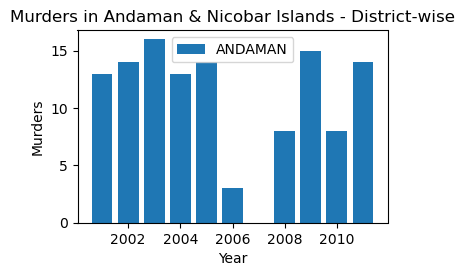

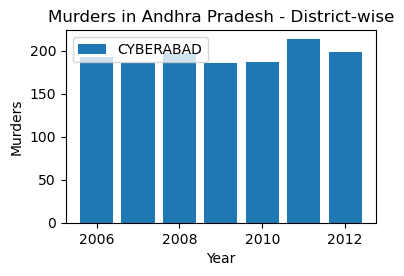

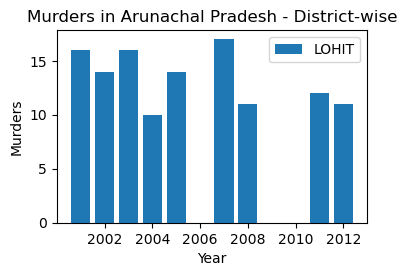

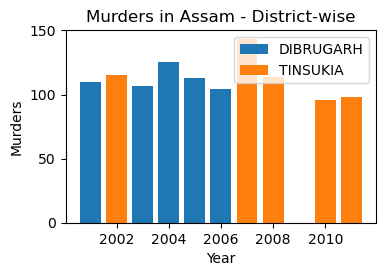

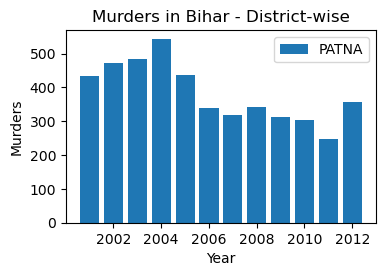

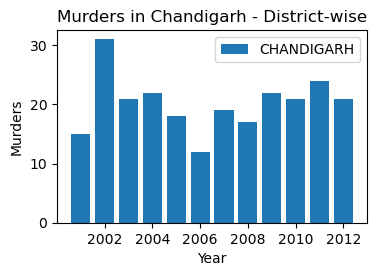

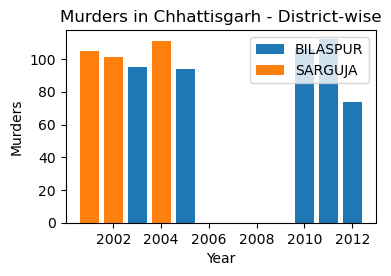

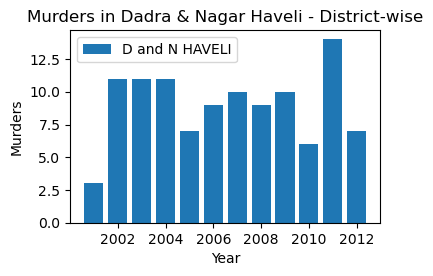

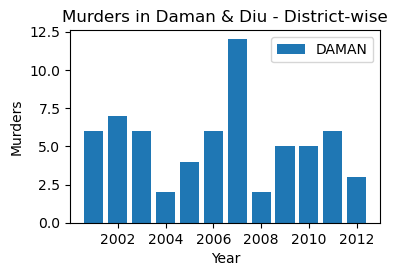

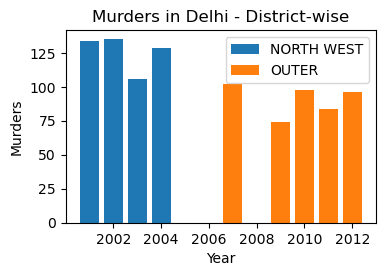

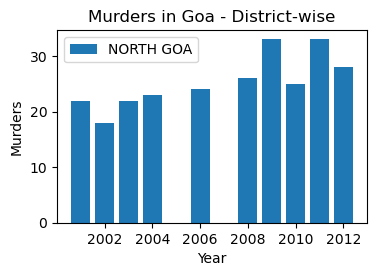

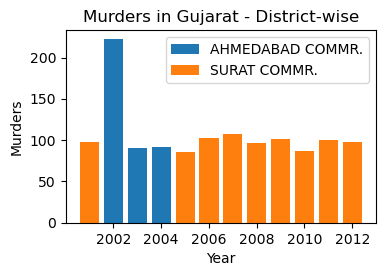

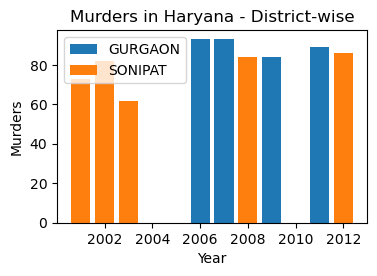

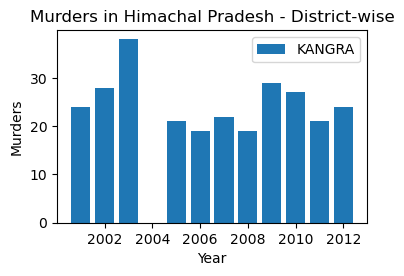

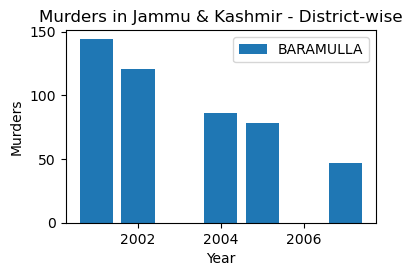

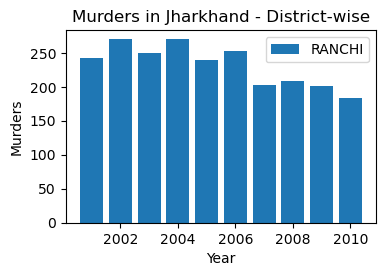

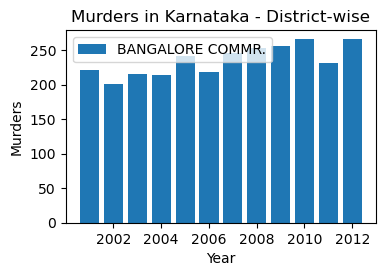

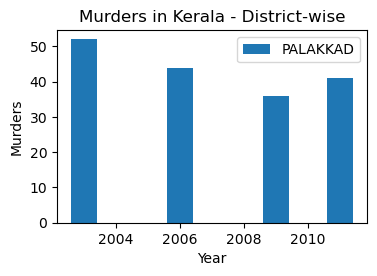

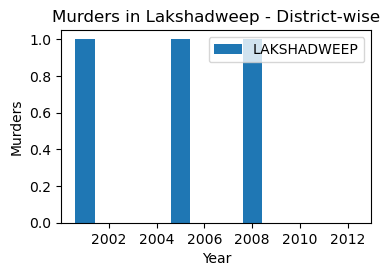

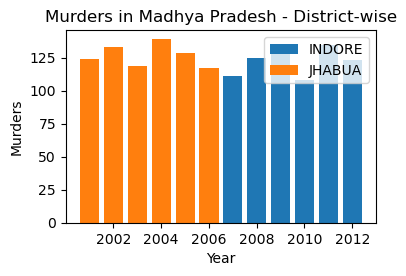

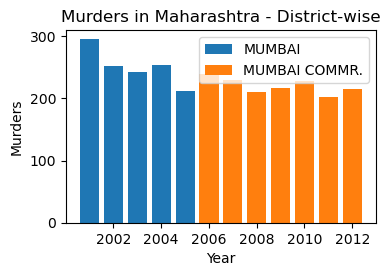

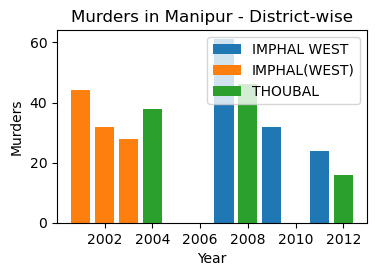

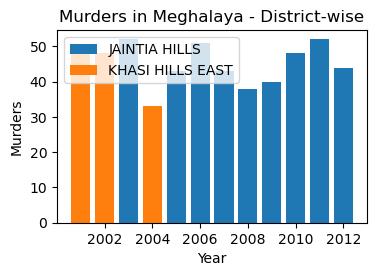

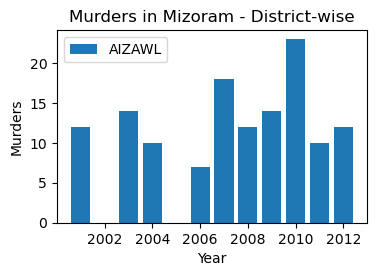

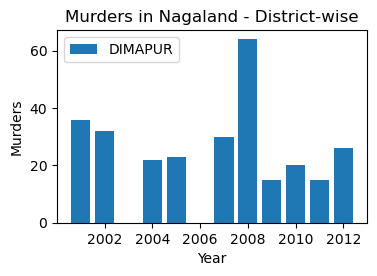

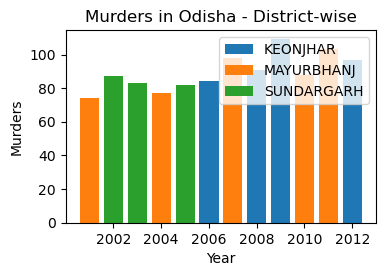

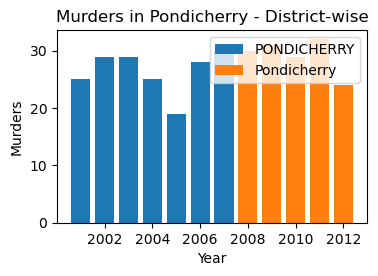

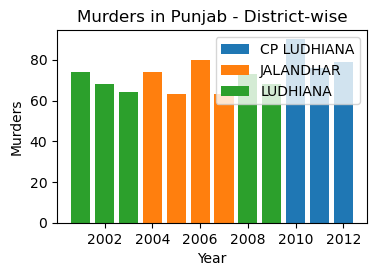

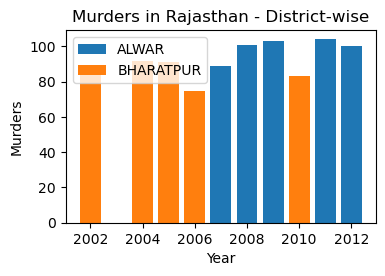

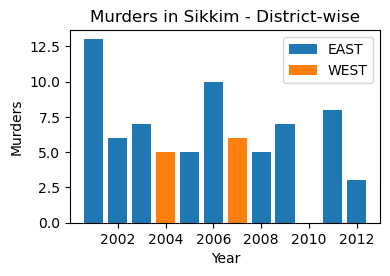

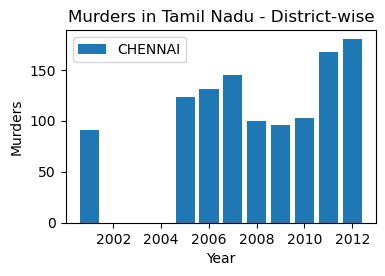

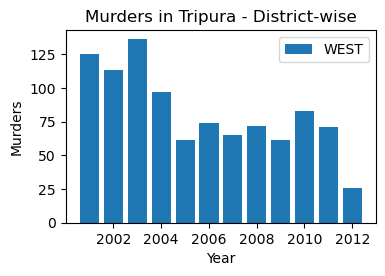

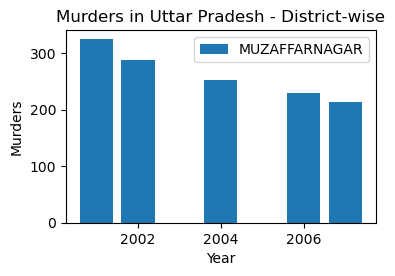

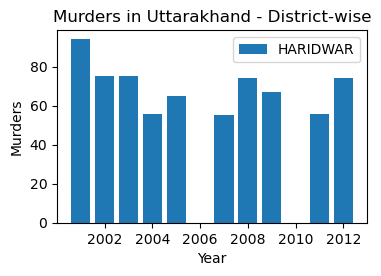

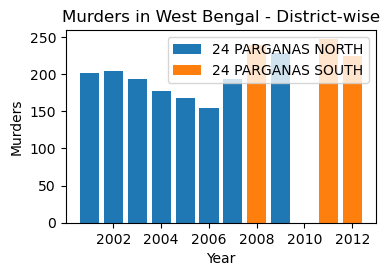

In [24]:
# Plot bar graph for each state separately
for state, state_data in result.groupby('STATE/UT'):
    plt.figure(figsize=(4, 2.5))
    for district, district_data in state_data.groupby('DISTRICT'):
        plt.bar(district_data['YEAR'], district_data['MURDERS'], label=district)

    plt.title(f'Murders in {state} - District-wise')
    plt.xlabel('Year')
    plt.ylabel('Murders')
    plt.legend()
    plt.show()